# Clasificación múltiple de dígitos MNIST con Keras

Basado en [Training an neural network on MNIST with Keras](https://www.tensorflow.org/datasets/keras_example)

In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib
from matplotlib import pyplot as plt

Crear un pipeline de entrada.

Cargar el dataset MNIST.

`shuffle_files=True` es útil con datasets grandes almacenado en múltiples archivos.
`as_supervised=True` regresa una tupla `(img, label)`.

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Crear un pipeline de entrenamiento
* Normalizar imágenes. El modelo espera `tf.float32`.
* Almacenar en cache el dataset antes de reordenarlo.
* Reordenar aleatoriamente todo el dataset.
* Agrupar los elementos del dataset en batches para que sean únicos en las épocas.
* Aplicar prefetching para mejorar el desempeño.


In [3]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

Implementar un pipeline de evaluación
* No es necesario reordenar las instancias del dataset.
* Los batches pueden ser los mismos entre épocas.

In [4]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

Crear y entrenar el modelo
Conectar el pipeline de entrada TFDS a un modelo simples de Keras, compilar y entrenar el modelo.

Modelo
El modelo debe ser de tipo `Sequential` constando de las siguientes capas:
Flatten: input_shape=(28, 28)
Dense: 128 unidades, activación ReLU
Dense: 10 unidades

Compilación del modelo
Optimizador Adam: 0.001
Pérdida: tf.keras.losses.SparseCategoricalCrossentropy, from_logits=True
Métricas: tf.keras.metrics.SparseCategoricalAccuracy()

Ajuste del modelo
Número de épocas: 6

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 100s 125ms/step - loss: 0.3599 - sparse_categorical_accuracy: 0.8999 - val_loss: 0.1915 - val_sparse_categorical_accuracy: 0.9443
Epoch 2/6
469/469 [==============================] - 2s 5ms/step - loss: 0.1638 - sparse_categorical_accuracy: 0.9535 - val_loss: 0.1355 - val_sparse_categorical_accuracy: 0.9602
Epoch 3/6
469/469 [==============================] - 3s 5ms/step - loss: 0.1168 - sparse_categorical_accuracy: 0.9665 - val_loss: 0.1095 - val_sparse_categorical_accuracy: 0.9679
Epoch 4/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0903 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.0938 - val_sparse_categorical_accuracy: 0.9710
Epoch 5/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0727 - sparse_categorical_accuracy: 0.9789 - val_loss: 0.0843 - val_sparse_categorical_accuracy: 0.9740
Epoch 6/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0604 - sparse_categorical_

In [12]:
history.history
train_losses = history.history["loss"]
val_losses = history.history["val_loss"]

In [9]:
def plot_metrics(train_metric, val_metric, metric_type):
  # Visualize metrics vs training Epochs
  plt.figure()
  plt.plot(range(len(train_metric)), train_metric, label = f"Training {metric_type}")
  plt.plot(range(len(val_metric)), val_metric, label = f"Validation {metric_type}")
  plt.xlabel("Epochs")
  plt.ylabel(metric_type)
  plt.legend()
  plt.title(f"{metric_type} vs Training epochs");

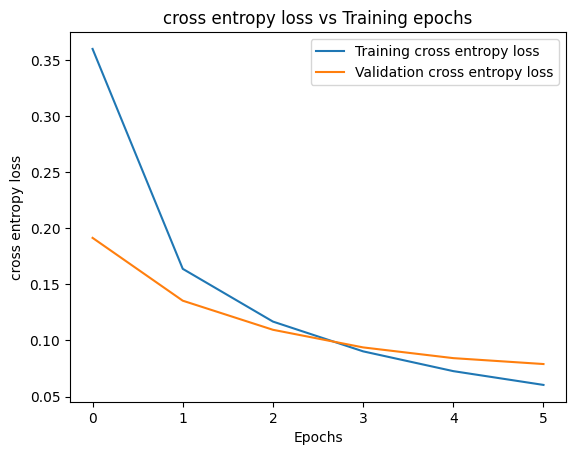

In [15]:
plot_metrics(train_losses, val_losses, "cross entropy loss")